In [1]:
import numpy as np
import os, sys
import time
import pandas as pd
import matplotlib.pyplot as plt
# Add the parent directory (one level up) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

import pipeline

In [2]:
#load the dataset
pline = pipeline.Pipeline()
cols = ['user_id', 'item_id', 'rating', 'timestamp']
df = pline.load_dataset('../storage/u.data', column_names = cols)

#show ratings dataset
df.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


### Stratified Partitioning ###

In [3]:
train_data, test_data = pline.partition_data(df, partition_type = 'stratified')

In [4]:
#check if any of the users in train_data is in test data
train_users = train_data['user_id']
test_users = test_data['user_id']

if set(train_users).intersection(test_users):
    print("Some train users are in the test users dataset.")
else:
    print("No train users are in the test users dataset.")

No train users are in the test users dataset.


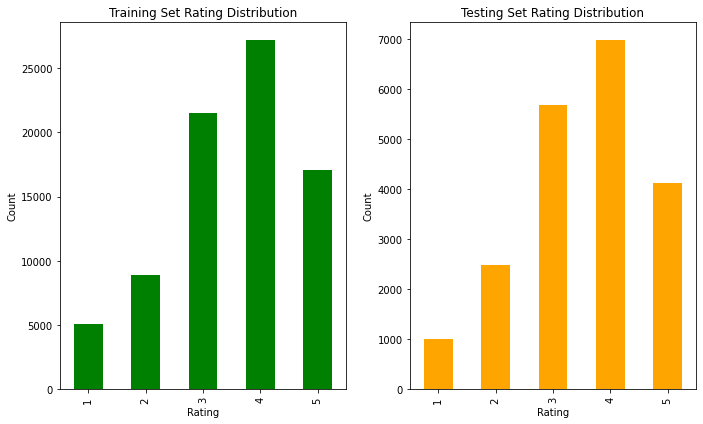

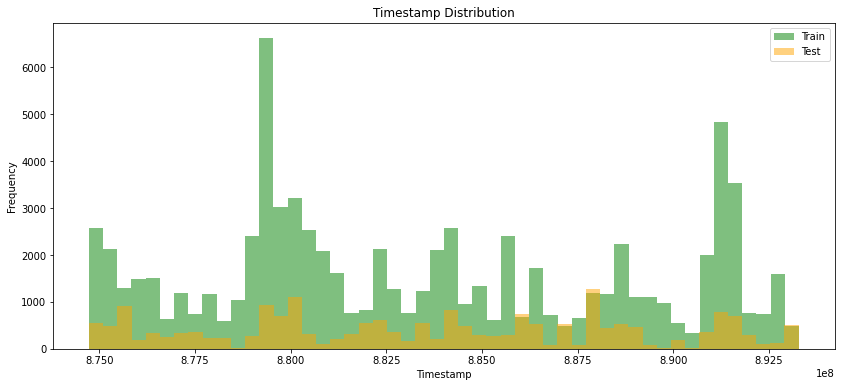

In [5]:
# Visualize rating distributions
plt.figure(figsize=(14, 6))

# Training set rating distribution
plt.subplot(1, 3, 2)
train_data['rating'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Training Set Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Testing set rating distribution
plt.subplot(1, 3, 3)
test_data['rating'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Testing Set Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Visualize timestamp distributions
plt.figure(figsize=(14, 6))

# Overall timestamp distribution
plt.hist(train_data['timestamp'], bins=50, color='green', alpha=0.5, label='Train')
plt.hist(test_data['timestamp'], bins=50, color='orange', alpha=0.5, label='Test')
plt.title('Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Temporal Partition ###

In [10]:
train_data, test_data = pline.partition_data(df, partition_type = 'temporal')

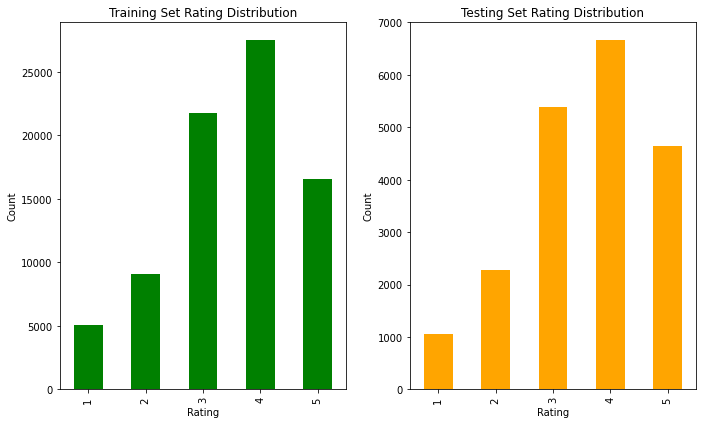

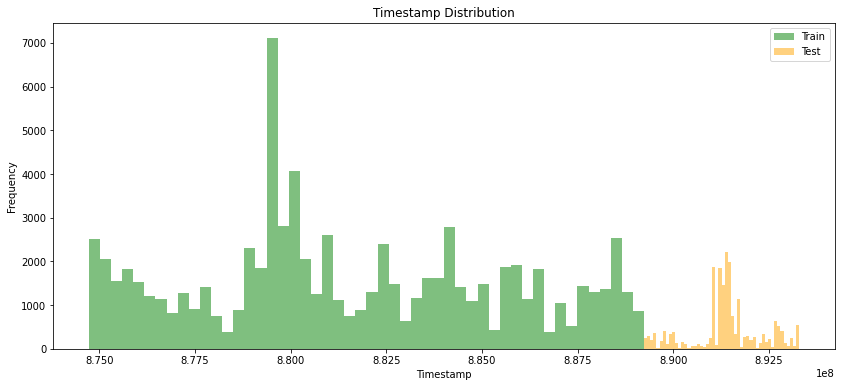

In [12]:
# Visualize rating distributions
plt.figure(figsize=(14, 6))

# Training set rating distribution
plt.subplot(1, 3, 2)
train_data['rating'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Training Set Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Testing set rating distribution
plt.subplot(1, 3, 3)
test_data['rating'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Testing Set Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Visualize timestamp distributions
plt.figure(figsize=(14, 6))

# Overall timestamp distribution
plt.hist(train_data['timestamp'], bins=50, color='green', alpha=0.5, label='Train')
plt.hist(test_data['timestamp'], bins=50, color='orange', alpha=0.5, label='Test')
plt.title('Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.legend()
plt.show()